# CLICK STREAM ANALYTICS PROJECT_PART I

In [2]:
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [3]:
hcsdata = pd.read_excel('HotelClickStream.xls')

In [98]:
hcsdata.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430


In [5]:
hcsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 16 columns):
ID                   3749 non-null int64
DOMAIN_ID            3749 non-null uint64
MACHINE_ID           3749 non-null int64
SITE_SESSION_ID      3749 non-null int64
TRANS_FREQ           3749 non-null int64
DOMAIN_NAME          3749 non-null object
DIRECTP_D            3749 non-null int64
PROD_NAME            3749 non-null object
PROD_QTY             3749 non-null int64
PROD_TOTPRICE        3749 non-null float64
REF_DOMAIN_NAME      1687 non-null object
DURATION             3749 non-null float64
PAGES_VIEWED         3749 non-null int64
HOUSEHOLD_SIZE       3749 non-null int64
CHILDREN_D           3749 non-null int64
CONNECTIONSPEED_D    3749 non-null int64
dtypes: float64(2), int64(10), object(3), uint64(1)
memory usage: 468.8+ KB


In [6]:
hcsdata.describe()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DIRECTP_D,PROD_QTY,PROD_TOTPRICE,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D
count,3749.000000,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,1877.293678,8.436032e+18,8.615370e+07,1.976820e+13,2.981328,0.481462,1.717258,163.859624,25.317508,18.331288,3.273940,0.603894,0.992265
std,1083.651205,4.548078e+18,6.798597e+06,2.750259e+13,4.120927,0.499723,1.387385,184.484515,22.806497,16.636523,4.388536,0.489152,0.087622
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,0.000000,0.000000,0.000000,0.029999,1.000000,1.000000,0.000000,0.000000
25%,939.000000,5.078454e+18,8.197324e+07,4.404378e+12,1.000000,0.000000,1.000000,71.950000,9.449219,8.000000,2.000000,0.000000,1.000000
50%,1878.000000,7.317461e+18,8.698025e+07,5.037588e+12,2.000000,0.000000,1.000000,115.990000,17.777344,13.000000,3.000000,1.000000,1.000000
75%,2815.000000,9.530953e+18,9.165384e+07,6.535772e+12,3.000000,1.000000,2.000000,199.980000,33.656250,23.000000,4.000000,1.000000,1.000000
max,3753.000000,1.747520e+19,9.532007e+07,7.441268e+13,30.000000,1.000000,32.000000,2847.039993,227.343750,141.000000,99.000000,1.000000,1.000000


# 1) Please first create the following 2 additional variables into your data 
* 1) REF_D (create a dummy variable indicating whether the transaction was referenced from other website, if not, the final booking website was directly accessed. 
* If no information provided for the variable REF_DOMAIN_NAME, REF_D = 0; otherwise REF_D = 1) 

In [7]:
hcsdata.loc[pd.isna(hcsdata.REF_DOMAIN_NAME),'REF_D']=0
hcsdata.loc[pd.notna(hcsdata.REF_DOMAIN_NAME),'REF_D']=1

In [8]:
hcsdata.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0


# 1 LOG_PRICE (take the log transformation of the variable PROD_TOTPRICE )

In [9]:
hcsdata.PROD_TOTPRICE.min()

0.0

In [10]:
hcsdata['LOG_PRICE'] = np.log(hcsdata['PROD_TOTPRICE'])

C:\Users\chike\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
hcsdata['LOG_PRICE']=np.log1p(hcsdata.PROD_TOTPRICE)

In [12]:
hcsdata.head()

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
0,1525,13877604970862366012,85643811,4447900536932,1,ichotelsgroup.com,1,FT. LAUDERDALE AIRPORT/CRUISE - CROWNE PLAZA H...,32,2847.039993,NaN,23.328125,13,6,1,1,0.0,7.954386
1,402,7101213156062330967,76460408,71774258860245,1,orbitz.com,0,WALT DISNEY WORLD MAGIC YOUR WAY TICKETS! N/A,1,2406.939995,yahoo.com,47.109375,17,2,1,1,1.0,7.786527
2,233,7772350535129410931,74286590,3825866182640,1,hyatt.com,1,HYATT REGENCY MAUI RESORT SPA FRI 11 MAR 2011...,5,2168.000000,google.com,20.058594,19,1,0,1,1.0,7.682022
3,2362,9530952911301729568,90015830,70000481538306,1,expedia.com,0,HOTEL - THE ADDRESS DUBAI MARINA ~SAT DEC/10/2...,5,1958.699997,NaN,47.546875,39,1,0,1,0.0,7.580547
4,2738,4024709573451844450,91435029,5158448795791,2,starwoodhotels.com,1,HOTEL-W NEW YORK - TIMES SQUARE 08/18~08/21,3,1797.000000,whotels.com,14.599609,19,1,0,1,1.0,7.494430


In [13]:
hcsdata.PROD_TOTPRICE.min()

0.0

# a) Please provide a summary table showing the top 10 domain names (DOMAIN_NAME) that generated the most volume of transactions the report should look like the following Table. 
* Please summarize briefly your observations from the results 

In [14]:
DomFreq=hcsdata.groupby("DOMAIN_NAME").count()[['TRANS_FREQ']]

In [15]:
DomFreq.head()

,TRANS_FREQ
DOMAIN_NAME,
americanexpress-travel.com,8
aol.com,1
bestwestern.com,120
cheaptickets.com,23
choicehotels.com,297


In [16]:
DomFreq.sort_values(by='TRANS_FREQ',ascending=False)

,TRANS_FREQ
DOMAIN_NAME,
marriott.com,524
hilton.com,438
hotels.com,400
expedia.com,380
priceline.com,309
choicehotels.com,297
jetblue.com,229
hotwire.com,217
bestwestern.com,120


In [17]:
DomFreqTop10=DomFreq.nlargest(10, 'TRANS_FREQ')

In [18]:
DomFreqTop10.head() #Ran to see if we have the first 10 largest. 

,TRANS_FREQ
DOMAIN_NAME,
marriott.com,524
hilton.com,438
hotels.com,400
expedia.com,380
priceline.com,309


In [19]:
tablerank=DomFreqTop10.assign(Rank=[1,2,3,4,5,6,7,8,9,10])


In [20]:
tablerank.head(10)

,TRANS_FREQ,Rank
DOMAIN_NAME,,
marriott.com,524,1
hilton.com,438,2
hotels.com,400,3
expedia.com,380,4
priceline.com,309,5
choicehotels.com,297,6
jetblue.com,229,7
hotwire.com,217,8
bestwestern.com,120,9


# b) Please provide a summary table showing the top 10 reference domain names (REF_DOMAIN_NAME) that generated the most volume of transactions

In [21]:
reftable=  hcsdata.groupby("REF_DOMAIN_NAME").count()[['TRANS_FREQ']]

In [22]:
print (reftable)

                       TRANS_FREQ
REF_DOMAIN_NAME                  
2mdn.net                        1
60searchengines.com             1
aaa.com                         9
aaasouth.com                    2
aaawa.com                       1
...                           ...
wyndham.com                     2
wyndhamhoteltampa.com           1
yahoo.com                     222
yahoo.net                      15
ycheckrates.com                 1

[229 rows x 1 columns]


In [23]:
top10ref = reftable.sort_values('TRANS_FREQ',axis=0,ascending=False,inplace=False,kind='quicksort',na_position='last').head(10)


In [24]:
top10ref.head(10)

,TRANS_FREQ
REF_DOMAIN_NAME,
google.com,620
yahoo.com,222
bing.com,129
aol.com,53
comfortinn.com,48
jetblue.com,43
qualityinn.com,29
comfortsuites.com,22
kayak.com,20


In [25]:
tablerankref=top10ref.assign(Rank=[1,2,3,4,5,6,7,8,9,10])


In [26]:
tablerankref.head(10)

,TRANS_FREQ,Rank
REF_DOMAIN_NAME,,
google.com,620,1
yahoo.com,222,2
bing.com,129,3
aol.com,53,4
comfortinn.com,48,5
jetblue.com,43,6
qualityinn.com,29,7
comfortsuites.com,22,8
kayak.com,20,9


# c)  Please provide summary statistics (N, Max, Min, Mean, and Std.) 
- for variables: DIRECTP_D; REF_D; DURATION; PAGES_VIEWED; LOG_PRICE; and TRANS_FREQ. Please report your summary statistics table.

In [27]:
hcsdata[['DIRECTP_D', 'REF_D', 'DURATION','PAGES_VIEWED', 'LOG_PRICE','TRANS_FREQ']].describe()

,DIRECTP_D,REF_D,DURATION,PAGES_VIEWED,LOG_PRICE,TRANS_FREQ
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.481462,0.449987,25.317508,18.331288,4.439926,2.981328
std,0.499723,0.497559,22.806497,16.636523,1.615478,4.120927
min,0.000000,0.000000,0.029999,1.000000,0.000000,1.000000
25%,0.000000,0.000000,9.449219,8.000000,4.289774,1.000000
50%,0.000000,0.000000,17.777344,13.000000,4.762088,2.000000
75%,1.000000,1.000000,33.656250,23.000000,5.303205,3.000000
max,1.000000,1.000000,227.343750,141.000000,7.954386,30.000000


# Other Methods of Providing Descriptive Statistics

In [28]:
hcsdata.describe(include=['object'])

,DOMAIN_NAME,PROD_NAME,REF_DOMAIN_NAME
count,3749,3749,1687
unique,33,3570,229
top,marriott.com,N/A ~,google.com
freq,524,86,620


In [29]:
hcsdata.describe(include='all')

,ID,DOMAIN_ID,MACHINE_ID,SITE_SESSION_ID,TRANS_FREQ,DOMAIN_NAME,DIRECTP_D,PROD_NAME,PROD_QTY,PROD_TOTPRICE,REF_DOMAIN_NAME,DURATION,PAGES_VIEWED,HOUSEHOLD_SIZE,CHILDREN_D,CONNECTIONSPEED_D,REF_D,LOG_PRICE
count,3749.000000,3.749000e+03,3.749000e+03,3.749000e+03,3749.000000,3749,3749.000000,3749,3749.000000,3749.000000,1687,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
unique,NaN,NaN,NaN,NaN,NaN,33,NaN,3570,NaN,NaN,229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,marriott.com,NaN,N/A ~,NaN,NaN,google.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,524,NaN,86,NaN,NaN,620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1877.293678,8.436032e+18,8.615370e+07,1.976820e+13,2.981328,NaN,0.481462,NaN,1.717258,163.859624,NaN,25.317508,18.331288,3.273940,0.603894,0.992265,0.449987,4.439926
std,1083.651205,4.548078e+18,6.798597e+06,2.750259e+13,4.120927,NaN,0.499723,NaN,1.387385,184.484515,NaN,22.806497,16.636523,4.388536,0.489152,0.087622,0.497559,1.615478
min,1.000000,8.614049e+17,1.764018e+07,3.170357e+12,1.000000,NaN,0.000000,NaN,0.000000,0.000000,NaN,0.029999,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,939.000000,5.078454e+18,8.197324e+07,4.404378e+12,1.000000,NaN,0.000000,NaN,1.000000,71.950000,NaN,9.449219,8.000000,2.000000,0.000000,1.000000,0.000000,4.289774
50%,1878.000000,7.317461e+18,8.698025e+07,5.037588e+12,2.000000,NaN,0.000000,NaN,1.000000,115.990000,NaN,17.777344,13.000000,3.000000,1.000000,1.000000,0.000000,4.762088
75%,2815.000000,9.530953e+18,9.165384e+07,6.535772e+12,3.000000,NaN,1.000000,NaN,2.000000,199.980000,NaN,33.656250,23.000000,4.000000,1.000000,1.000000,1.000000,5.303205


In [30]:
hcsdata[["DIRECTP_D"]].describe()

,DIRECTP_D
count,3749.000000
mean,0.481462
std,0.499723
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [31]:
hcsdata[["REF_D"]].describe()

,REF_D
count,3749.000000
mean,0.449987
std,0.497559
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [32]:
hcsdata[["DURATION"]].describe()

,DURATION
count,3749.000000
mean,25.317508
std,22.806497
min,0.029999
25%,9.449219
50%,17.777344
75%,33.656250
max,227.343750


In [33]:
hcsdata[["PAGES_VIEWED"]].describe()

,PAGES_VIEWED
count,3749.000000
mean,18.331288
std,16.636523
min,1.000000
25%,8.000000
50%,13.000000
75%,23.000000
max,141.000000


In [34]:
hcsdata[["LOG_PRICE"]].describe()

,LOG_PRICE
count,3749.000000
mean,4.439926
std,1.615478
min,0.000000
25%,4.289774
50%,4.762088
75%,5.303205
max,7.954386


In [35]:
hcsdata[["TRANS_FREQ"]].describe()

,TRANS_FREQ
count,3749.000000
mean,2.981328
std,4.120927
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,30.000000


# d) Please make a Scatter Plot and a Histogram for any of the variables of your own interests in the data. Then report any insights you may be able draw from the charts. 

- We created a Scatterplots for three variables: Duration, Pages_Viewed, and TRANS_FREQ

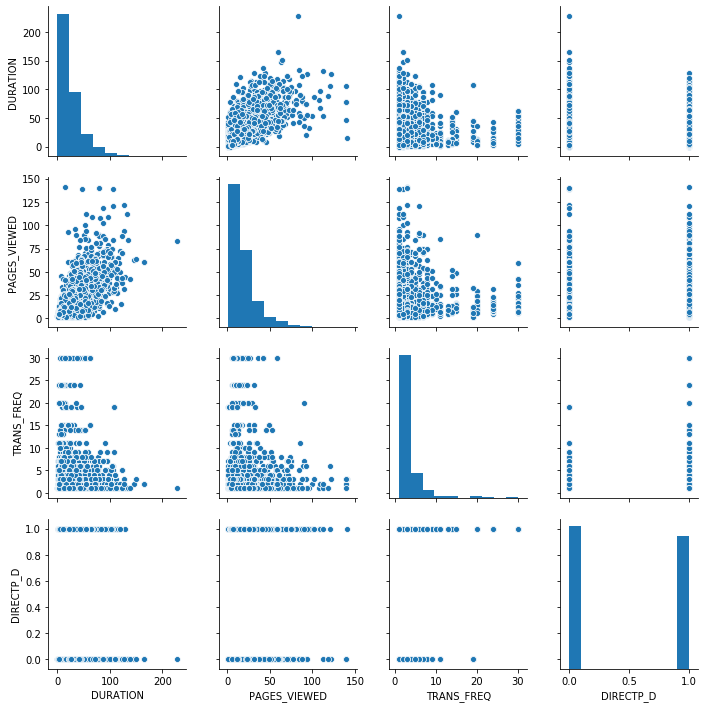

In [36]:
sns.pairplot(hcsdata,vars=["DURATION","PAGES_VIEWED","TRANS_FREQ","DIRECTP_D"])

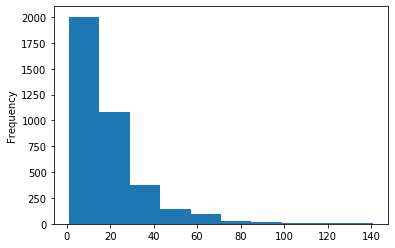

In [37]:
hcsdata["PAGES_VIEWED"].plot.hist()

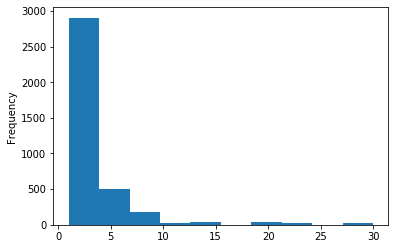

In [38]:
hcsdata["TRANS_FREQ"].plot.hist()

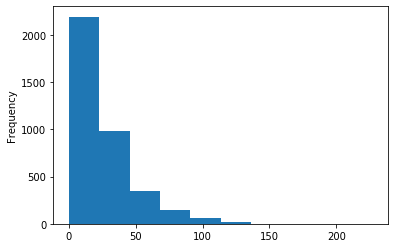

In [39]:
hcsdata["DURATION"].plot.hist()

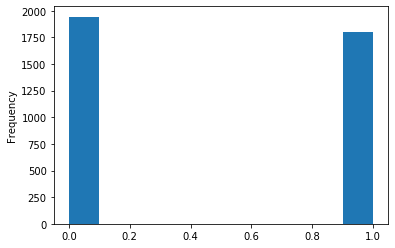

In [40]:
hcsdata["DIRECTP_D"].plot.hist()

# 2 ) Regression Analysis 
# Explolatory Data Analysis
# What are the factors that influence how much time people spend on a website?

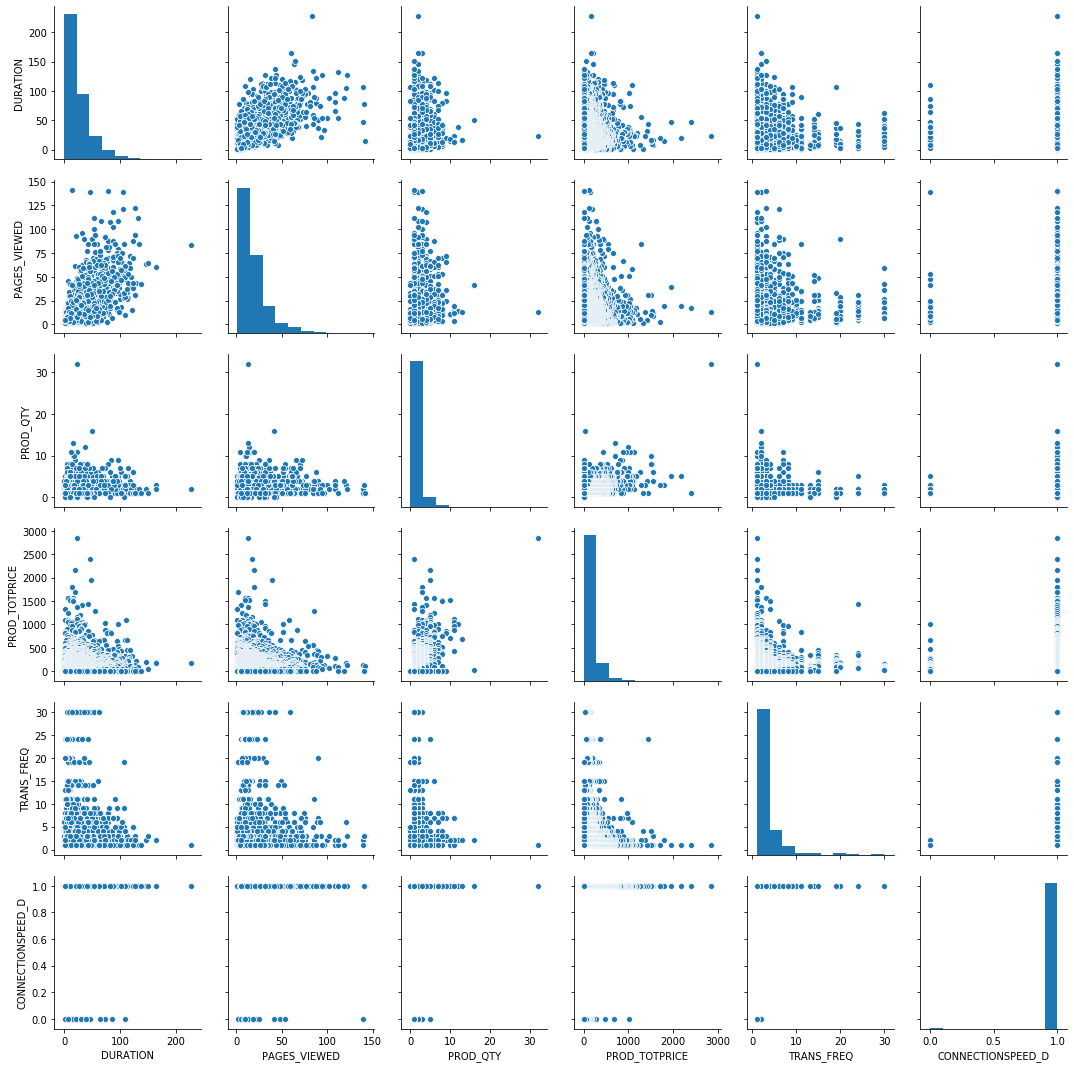

In [41]:
sns.pairplot(hcsdata,vars=["DURATION","PAGES_VIEWED","PROD_QTY","PROD_TOTPRICE","TRANS_FREQ","CONNECTIONSPEED_D"])

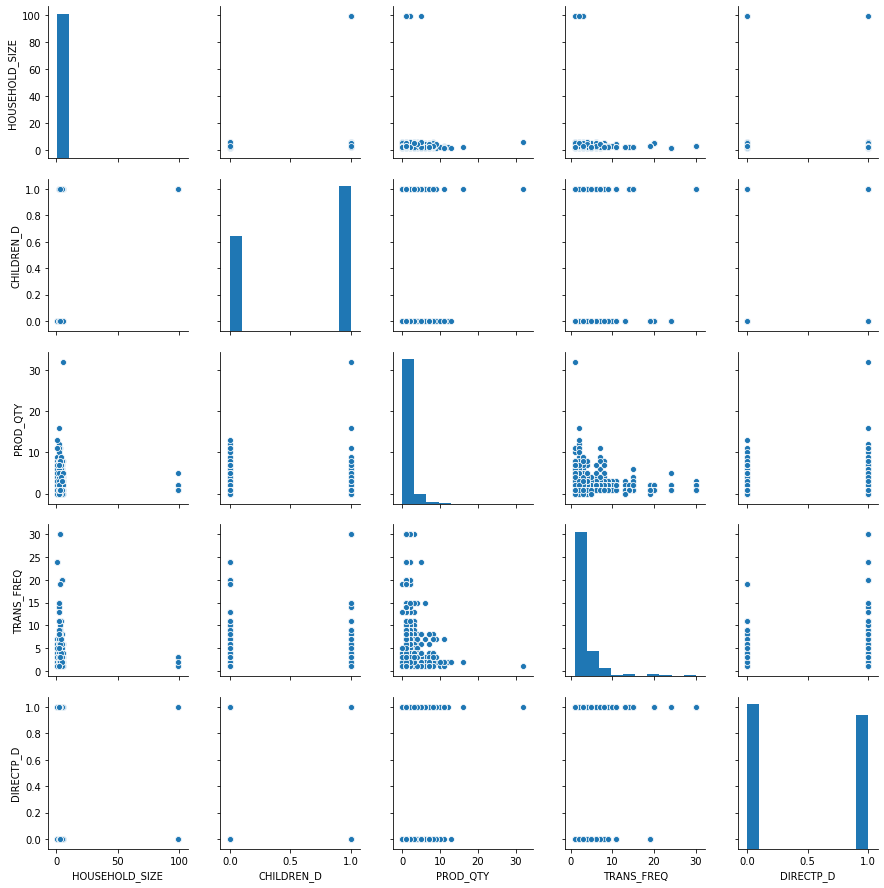

In [42]:
sns.pairplot(hcsdata,vars=["HOUSEHOLD_SIZE","CHILDREN_D","PROD_QTY","TRANS_FREQ","DIRECTP_D"])

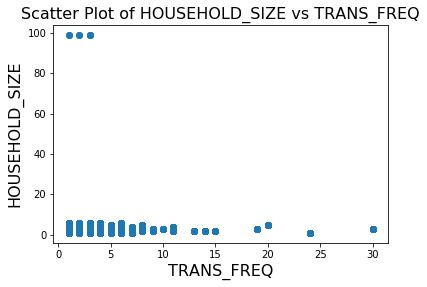

In [43]:
plt.scatter(hcsdata['TRANS_FREQ'],hcsdata['HOUSEHOLD_SIZE'])
plt.xlabel('TRANS_FREQ',fontsize=16)
plt.ylabel('HOUSEHOLD_SIZE',fontsize=16)
plt.title('Scatter Plot of HOUSEHOLD_SIZE vs TRANS_FREQ',fontsize=16)
plt.show()

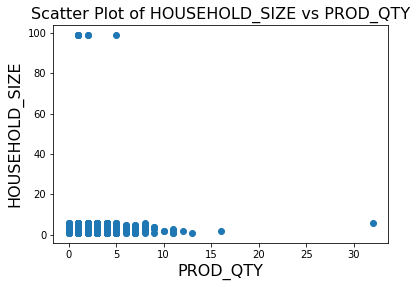

In [44]:
plt.scatter(hcsdata['PROD_QTY'],hcsdata['HOUSEHOLD_SIZE'])
plt.xlabel('PROD_QTY',fontsize=16)
plt.ylabel('HOUSEHOLD_SIZE',fontsize=16)
plt.title('Scatter Plot of HOUSEHOLD_SIZE vs PROD_QTY',fontsize=16)
plt.show()

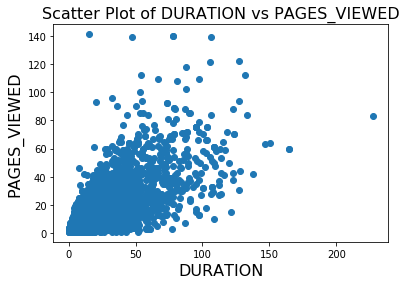

In [45]:
plt.scatter(hcsdata['DURATION'],hcsdata['PAGES_VIEWED'])
plt.xlabel('DURATION',fontsize=16)
plt.ylabel('PAGES_VIEWED',fontsize=16)
plt.title('Scatter Plot of DURATION vs PAGES_VIEWED',fontsize=16)
plt.show()

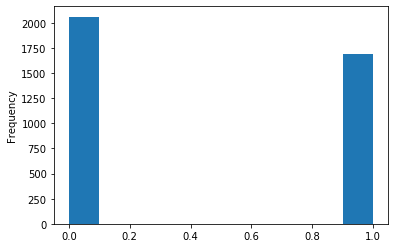

In [46]:
hcsdata["REF_D"].plot.hist()

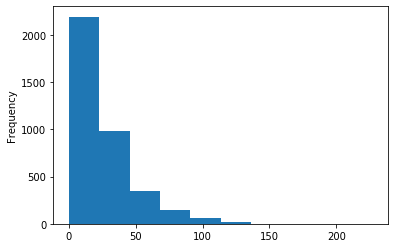

In [47]:
hcsdata["DURATION"].plot.hist()

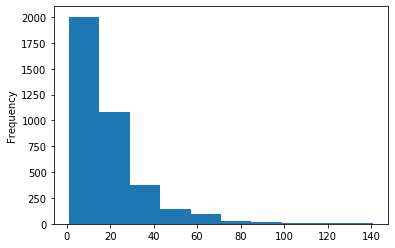

In [48]:
hcsdata["PAGES_VIEWED"].plot.hist()

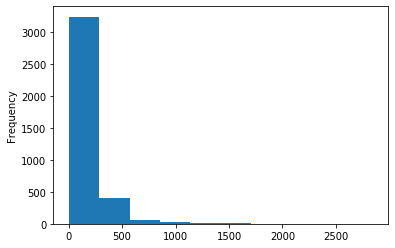

In [49]:
hcsdata["PROD_TOTPRICE"].plot.hist()

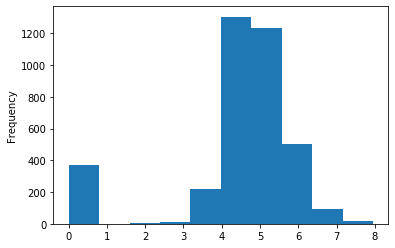

In [50]:
hcsdata["LOG_PRICE"].plot.hist()

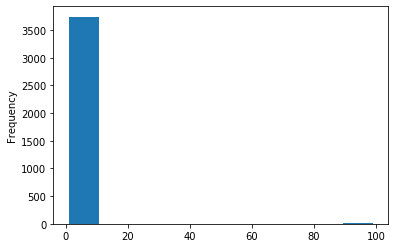

In [51]:
hcsdata["HOUSEHOLD_SIZE"].plot.hist()

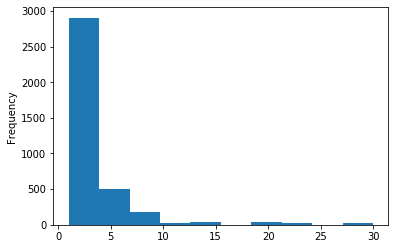

In [52]:
hcsdata["TRANS_FREQ"].plot.hist()

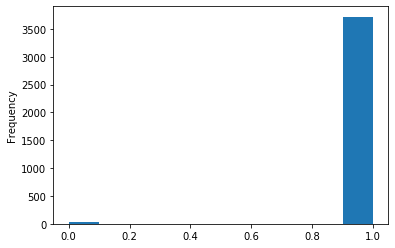

In [53]:
hcsdata["CONNECTIONSPEED_D"].plot.hist()

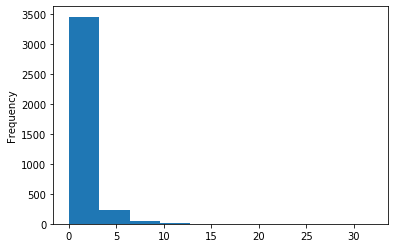

In [54]:
hcsdata["PROD_QTY"].plot.hist()

# 2a) Please use the linear regression technique to answer the question on 
* “what are the factors that influence how much time people spend on a website?”( Hint: use
DURATION as your DV). 
* You should try different set of independent variables in the data
set to see which one(s) has significant results (create dummy variables for some of the nonnumerical variables if needed). (Hint: you may start with doing pair-wise correlations
between Y and other variables to see what variables are significantly correlated with Y.)


Please report 1) the final set of independent variables you have chosen and why you have
chosen them; and 2) the estimated regression equation with simple explanations for each
estimated coefficient (β). Please ONLY report and interpret your final regression results. 

In [55]:
hcsdata.columns

Index(['ID', 'DOMAIN_ID', 'MACHINE_ID', 'SITE_SESSION_ID', 'TRANS_FREQ',
       'DOMAIN_NAME', 'DIRECTP_D', 'PROD_NAME', 'PROD_QTY', 'PROD_TOTPRICE',
       'REF_DOMAIN_NAME', 'DURATION', 'PAGES_VIEWED', 'HOUSEHOLD_SIZE',
       'CHILDREN_D', 'CONNECTIONSPEED_D', 'REF_D', 'LOG_PRICE'],
      dtype='object')

# Correlation Analysis: This test is performed in order to check if there exist any significant statistical correlation between the variables

In [56]:
"DURATION","PAGES_VIEWED","PROD_TOTPRICE","TRANS_FREQ","CONNECTIONSPEED_D", "DIRECTP_D"

('DURATION',
 'PAGES_VIEWED',
 'PROD_TOTPRICE',
 'TRANS_FREQ',
 'CONNECTIONSPEED_D',
 'DIRECTP_D')

# Testing to  see which Indepedent Variables has significant results for 2a

In [79]:
np.corrcoef(hcsdata.PAGES_VIEWED, hcsdata.TRANS_FREQ)

array([[1.        , 0.02502847],
       [0.02502847, 1.        ]])

In [80]:
np.corrcoef(hcsdata.PAGES_VIEWED, hcsdata.CONNECTIONSPEED_D)

array([[ 1.        , -0.00739311],
       [-0.00739311,  1.        ]])

In [81]:
np.corrcoef(hcsdata.PAGES_VIEWED, hcsdata.DIRECTP_D)

array([[ 1.        , -0.06566124],
       [-0.06566124,  1.        ]])

In [86]:
np.corrcoef(hcsdata.TRANS_FREQ, hcsdata.CONNECTIONSPEED_D)

array([[1.        , 0.03654548],
       [0.03654548, 1.        ]])

In [87]:
np.corrcoef(hcsdata.TRANS_FREQ, hcsdata.DIRECTP_D)

array([[1.        , 0.16320903],
       [0.16320903, 1.        ]])

In [88]:
np.corrcoef(hcsdata.CONNECTIONSPEED_D, hcsdata.DIRECTP_D)

array([[1.        , 0.01195759],
       [0.01195759, 1.        ]])

# Choosing the Independent Variables after testing for significant relationship
# For the DURATION 

In [66]:
np.corrcoef(hcsdata.DURATION, hcsdata.PAGES_VIEWED)

array([[1.       , 0.6850715],
       [0.6850715, 1.       ]])

In [77]:
np.corrcoef(hcsdata.DURATION, hcsdata.DIRECTP_D)

array([[ 1.        , -0.18200168],
       [-0.18200168,  1.        ]])

In [78]:
np.corrcoef(hcsdata.DURATION, hcsdata.CONNECTIONSPEED_D)

array([[ 1.        , -0.02153259],
       [-0.02153259,  1.        ]])

In [67]:
np.corrcoef(hcsdata.DURATION, hcsdata.TRANS_FREQ)

array([[ 1.        , -0.01091669],
       [-0.01091669,  1.        ]])

# Regression Analysis of DURATION

In [89]:
regmod=sm.OLS(hcsdata.DURATION,hcsdata[['PAGES_VIEWED','DIRECTP_D','CONNECTIONSPEED_D','TRANS_FREQ']])

In [90]:
regfit=regmod.fit()

In [91]:
print(regfit.summary())

                                 OLS Regression Results                                
Dep. Variable:               DURATION   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              3123.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):                        0.00
Time:                        18:02:33   Log-Likelihood:                         -15798.
No. Observations:                3749   AIC:                                  3.160e+04
Df Residuals:                    3745   BIC:                                  3.163e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

# Included Constant

In [92]:
indvars=sm.add_constant(hcsdata[['PAGES_VIEWED','DIRECTP_D','CONNECTIONSPEED_D','TRANS_FREQ']])

In [93]:
regmod=sm.OLS(hcsdata.DURATION,indvars)
regfit=regmod.fit()
print(regfit.summary())

                            OLS Regression Results                            
Dep. Variable:               DURATION   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     893.6
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:02:53   Log-Likelihood:                -15786.
No. Observations:                3749   AIC:                         3.158e+04
Df Residuals:                    3744   BIC:                         3.161e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                15.2123      3.05

# 2b) What are the factors that influence how many pages people view when visiting a website?”
(Hint:use PAGES_VIEWED as your DV). And decide your IVs by conducting the similar exercises in the above analysis. Please ONLY report and interpret your final regression results.

# Testing for Independent Variables Correlation for PAGES_VIEWED(DV)

In [102]:
np.corrcoef(hcsdata.DURATION, hcsdata.PROD_QTY)

array([[1.        , 0.12712173],
       [0.12712173, 1.        ]])

In [104]:
np.corrcoef(hcsdata.DURATION, hcsdata.REF_D)

array([[1.        , 0.00351351],
       [0.00351351, 1.        ]])

In [105]:
np.corrcoef(hcsdata.REF_D, hcsdata.PROD_QTY)

array([[ 1.        , -0.04870552],
       [-0.04870552,  1.        ]])

# Correlation values already ran above, but see the correlation values between the PAGES VIEWED and the ones chosen.

In [106]:
np.corrcoef(hcsdata.PAGES_VIEWED, hcsdata.DURATION)

array([[1.       , 0.6850715],
       [0.6850715, 1.       ]])

In [96]:
np.corrcoef(hcsdata.PAGES_VIEWED, hcsdata.PROD_QTY)

array([[1.        , 0.12627839],
       [0.12627839, 1.        ]])

In [107]:
np.corrcoef(hcsdata.PAGES_VIEWED, hcsdata.REF_D)

array([[ 1.        , -0.00744194],
       [-0.00744194,  1.        ]])

# Regression Analysis of DURATION

In [108]:
regmodB=sm.OLS(hcsdata.PAGES_VIEWED,hcsdata[['DURATION','REF_D','PROD_QTY']])

In [109]:
regfitB=regmodB.fit()
print(regfitB.summary())

                                 OLS Regression Results                                
Dep. Variable:           PAGES_VIEWED   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              3775.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):                        0.00
Time:                        18:38:20   Log-Likelihood:                         -14740.
No. Observations:                3749   AIC:                                  2.949e+04
Df Residuals:                    3746   BIC:                                  2.951e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Included Constant

In [112]:
indvarsB=sm.add_constant(hcsdata[['DURATION','REF_D','PROD_QTY']])

In [113]:
regmodB=sm.OLS(hcsdata.PAGES_VIEWED,indvarsB)
regfitB=regmodB.fit()
print(regfitB.summary())

                            OLS Regression Results                            
Dep. Variable:           PAGES_VIEWED   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     1111.
Date:                Sat, 28 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:39:24   Log-Likelihood:                -14666.
No. Observations:                3749   AIC:                         2.934e+04
Df Residuals:                    3745   BIC:                         2.937e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0782      0.413     12.286      0.0

# 2d) Please summarize your observations by comparing the results from a) and b)

 Included in Final Report on Word.